# Importing model and weights

In [1]:
from tensorflow.keras.applications import MobileNetV2

2022-12-05 00:52:10.671626: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-05 00:52:10.671699: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D,Dense,Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D, ZeroPadding2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model, Sequential

In [3]:
img_width,img_height=224,224

model=MobileNetV2(weights='imagenet',
                include_top=False,
                input_shape=(img_height,img_width,3)
                )

2022-12-05 00:53:02.270231: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-05 00:53:02.270476: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-05 00:53:02.270676: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (madan-Inspiron-15-3567): /proc/driver/nvidia/version does not exist
2022-12-05 00:53:02.286586: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
for (i,layer) in enumerate(model.layers):
    print(f"{i} {layer.__class__.__name__} {layer.trainable}")

0 InputLayer True
1 Conv2D True
2 BatchNormalization True
3 ReLU True
4 DepthwiseConv2D True
5 BatchNormalization True
6 ReLU True
7 Conv2D True
8 BatchNormalization True
9 Conv2D True
10 BatchNormalization True
11 ReLU True
12 ZeroPadding2D True
13 DepthwiseConv2D True
14 BatchNormalization True
15 ReLU True
16 Conv2D True
17 BatchNormalization True
18 Conv2D True
19 BatchNormalization True
20 ReLU True
21 DepthwiseConv2D True
22 BatchNormalization True
23 ReLU True
24 Conv2D True
25 BatchNormalization True
26 Add True
27 Conv2D True
28 BatchNormalization True
29 ReLU True
30 ZeroPadding2D True
31 DepthwiseConv2D True
32 BatchNormalization True
33 ReLU True
34 Conv2D True
35 BatchNormalization True
36 Conv2D True
37 BatchNormalization True
38 ReLU True
39 DepthwiseConv2D True
40 BatchNormalization True
41 ReLU True
42 Conv2D True
43 BatchNormalization True
44 Add True
45 Conv2D True
46 BatchNormalization True
47 ReLU True
48 DepthwiseConv2D True
49 BatchNormalization True
50 ReLU True

In [5]:
for layer in model.layers:
    layer.trainable=False

In [6]:
for (i,layer) in enumerate(model.layers):
    print(f"{i} {layer.__class__.__name__} {layer.trainable}")

0 InputLayer False
1 Conv2D False
2 BatchNormalization False
3 ReLU False
4 DepthwiseConv2D False
5 BatchNormalization False
6 ReLU False
7 Conv2D False
8 BatchNormalization False
9 Conv2D False
10 BatchNormalization False
11 ReLU False
12 ZeroPadding2D False
13 DepthwiseConv2D False
14 BatchNormalization False
15 ReLU False
16 Conv2D False
17 BatchNormalization False
18 Conv2D False
19 BatchNormalization False
20 ReLU False
21 DepthwiseConv2D False
22 BatchNormalization False
23 ReLU False
24 Conv2D False
25 BatchNormalization False
26 Add False
27 Conv2D False
28 BatchNormalization False
29 ReLU False
30 ZeroPadding2D False
31 DepthwiseConv2D False
32 BatchNormalization False
33 ReLU False
34 Conv2D False
35 BatchNormalization False
36 Conv2D False
37 BatchNormalization False
38 ReLU False
39 DepthwiseConv2D False
40 BatchNormalization False
41 ReLU False
42 Conv2D False
43 BatchNormalization False
44 Add False
45 Conv2D False
46 BatchNormalization False
47 ReLU False
48 DepthwiseCon

In [8]:
def add_layer_at_bottom(bottom_model, num_classes):
    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model

# Data Prep

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
train_data_dir='/home/madan/Documents/dataset/Train'
val_data_dir='/home/madan/Documents/dataset/Val'

In [11]:
from keras.layers.preprocessing.image_preprocessing import HORIZONTAL

train_datagen=ImageDataGenerator(rescale=1./255,
                                 rotation_range=45,
                                 width_shift_range=0.3,
                                 height_shift_range=0.3,
                                 horizontal_flip=True,
                                 fill_mode='nearest')

val_datagen=ImageDataGenerator(rescale=1./255)

In [12]:
batch_size=32

In [13]:
train_generator=train_datagen.flow_from_directory(train_data_dir,
                                                  target_size=(img_height,img_width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

val_generator=val_datagen.flow_from_directory(val_data_dir,
                                              target_size=(img_height,img_width),
                                              batch_size=batch_size,
                                              class_mode='categorical')


Found 335 images belonging to 13 classes.
Found 73 images belonging to 13 classes.


In [14]:
train_class_names = set()
num_train_samples=0
for i in train_generator.filenames:
    train_class_names.add(i.split('/')[0])
    num_train_samples+=1
print(num_train_samples)
train_class_names

335


{'Bear',
 'Deer',
 'Duck',
 'Elephant',
 'Monkey',
 'Parrot',
 'Peacock',
 'Pelican',
 'Penguin',
 'Squirrel',
 'Tiger',
 'Turtle',
 'Unknown'}

In [15]:
val_class_names = set()
num_val_samples=0
for i in val_generator.filenames:
    val_class_names.add(i.split('/')[0])
    num_val_samples+=1
print(num_val_samples)
val_class_names

73


{'Bear',
 'Deer',
 'Duck',
 'Elephant',
 'Monkey',
 'Parrot',
 'Peacock',
 'Pelican',
 'Penguin',
 'Squirrel',
 'Tiger',
 'Turtle',
 'Unknown'}

In [16]:
num_classes=len(train_generator.class_indices)
print(num_classes)
FC_head=add_layer_at_bottom(model,
                            num_classes)

main_model=Model(inputs=model.input,
                 outputs=FC_head)

main_model.summary()

13
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                          

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

# Training

In [17]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [18]:

checkpoint = ModelCheckpoint("Facial_recogNet.h5",
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=2,
                          verbose=1,
                          restore_best_weights=True)

callbacks=[checkpoint,earlystop]

main_model.compile(loss='categorical_crossentropy',
                   optimizer=RMSprop(learning_rate=0.0015),
                   metrics=['accuracy'])

epochs=50

batch_size = 32

history = main_model.fit(train_generator,
                         steps_per_epoch=num_train_samples//batch_size,
                         epochs=epochs,
                         callbacks=callbacks,
                         validation_data=val_generator,
                         validation_steps=num_val_samples//batch_size)



Epoch 1/50
10/10 [==============================] - ETA: 0s - loss: 8.3307 - accuracy: 0.2277
Epoch 1: val_loss improved from inf to 1.80235, saving model to Facial_recogNet.h5
10/10 [==============================] - 18s 1s/step - loss: 8.3307 - accuracy: 0.2277 - val_loss: 1.8023 - val_accuracy: 0.3594
Epoch 2/50
10/10 [==============================] - ETA: 0s - loss: 1.7251 - accuracy: 0.4917
Epoch 2: val_loss improved from 1.80235 to 1.26293, saving model to Facial_recogNet.h5
10/10 [==============================] - 9s 891ms/step - loss: 1.7251 - accuracy: 0.4917 - val_loss: 1.2629 - val_accuracy: 0.5781
Epoch 3/50
10/10 [==============================] - ETA: 0s - loss: 0.6015 - accuracy: 0.8152
Epoch 3: val_loss improved from 1.26293 to 0.88052, saving model to Facial_recogNet.h5
10/10 [==============================] - 9s 909ms/step - loss: 0.6015 - accuracy: 0.8152 - val_loss: 0.8805 - val_accuracy: 0.6562
Epoch 4/50
10/10 [==============================] - ETA: 0s - loss: 0.

## Inference

[[0.00961633 0.01032432 0.0027223  0.326811   0.00891271 0.00565501
  0.01308954 0.00994575 0.00160239 0.00406264 0.00386748 0.01994538
  0.58344513]]


'Unknown'

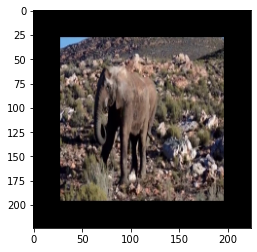

In [19]:
import cv2
out=['Bear',
 'Deer',
 'Duck',
 'Elephant',
 'Monkey',
 'Parrot',
 'Peacock',
 'Pelican',
 'Penguin',
 'Squirrel',
 'Tiger',
 'Turtle',
 'Unknown']
img=cv2.imread("/home/madan/Documents/dataset/Test_Images/Frame_102.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(224,224))
img=img/255.
import matplotlib.pyplot as plt
plt.imshow(img)
img=img.reshape(1,224,224,3)
import numpy as np
res=main_model.predict(img)
print(res)
out[np.argmax(res)]